In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
import keras_tuner as kt
from keras_tuner import RandomSearch
from GEH_LOSS import GEH_loss
import geh as ga

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
import relative_accuracy as ra

In [5]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5_multi.npz")['x'] 
Output_train_5 = np.load("Deep_train_5_multi.npz")['y']

Deep_test_5   = np.load("Deep_test_5_multi.npz")['x'] 
Output_test_5 = np.load("Deep_test_5_multi.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15_multi.npz")['x'] 
Output_train_15 = np.load("Deep_train_15_multi.npz")['y']

Deep_test_15   = np.load("Deep_test_15_multi.npz")['x'] 
Output_test_15 = np.load("Deep_test_15_multi.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30_multi.npz")['x'] 
Output_train_30 = np.load("Deep_train_30_multi.npz")['y']

Deep_test_30   = np.load("Deep_test_30_multi.npz")['x'] 
Output_test_30 = np.load("Deep_test_30_multi.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60_multi.npz")['x'] 
Output_train_60 = np.load("Deep_train_60_multi.npz")['y']

Deep_test_60   = np.load("Deep_test_60_multi.npz")['x'] 
Output_test_60 = np.load("Deep_test_60_multi.npz")['y']

In [6]:
# Wide Data
Xtrain = joblib.load("002weeks_train_Multi.save") 
Xtest = joblib.load("002weeks_test_Multi.save") 

In [7]:
# 5 mins
# Delete first 15 samples
Wide_train_5 = np.delete(Xtrain, np.s_[0:15], 0)
Wide_test_5 = np.delete(Xtest, np.s_[0:15], 0)

In [8]:
# 15 mins
# Delete first 17 samples
Wide_train_15 = np.delete(Xtrain, np.s_[0:17], 0)
Wide_test_15 = np.delete(Xtest, np.s_[0:17], 0)

In [9]:
# 30 mins
# Delete first 20 samples
Wide_train_30 = np.delete(Xtrain, np.s_[0:20], 0)
Wide_test_30 = np.delete(Xtest, np.s_[0:20], 0)

In [10]:
# 60 mins
# Delete first 27 samples
Wide_train_60 = np.delete(Xtrain, np.s_[0:26], 0)
Wide_test_60 = np.delete(Xtest, np.s_[0:26], 0)

In [11]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

C:\Users\esugom\.conda\envs\my_env\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
Test      = pd.read_csv('01test_scaled.csv', index_col=None, parse_dates=[8])

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
plt.rc('font', size=30)

# Reshape Samples

The first step is to split the input sequences into subsequences that can be processed by the CNN model. Here, each spatio-temporal sample can be split into three sub-samples, each with five time steps. The CNN can interpret each subsequence of five time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [14]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 7                # No of loop detectors
n_seq = 3                     # Subsequences
n_steps = 5                   # time-step per subsequence
# val_percent = 0.07567       # 2 weeks
val_percent = 0.2        
batch_size = 32

n_seq_ = 3                     # Subsequences
n_steps_ = 3                   # time-step per subsequence

#### 5 mins

In [15]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt5 = Deep_train_5.reshape((Deep_train_5.shape[0], n_seq, n_steps, n_features))
yt5 = scaler.inverse_transform(Output_train_5)

In [16]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv5 = Deep_test_5.reshape((Deep_test_5.shape[0], n_seq, n_steps, n_features))
yv5 = scaler.inverse_transform(Output_test_5)

#### 15 mins

In [17]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt15 = Deep_train_15.reshape((Deep_train_15.shape[0], n_seq, n_steps, n_features))
yt15 = scaler.inverse_transform(Output_train_15)

In [18]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv15 = Deep_test_15.reshape((Deep_test_15.shape[0], n_seq, n_steps, n_features))
yv15 = scaler.inverse_transform(Output_test_15)

#### 30 mins

In [19]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt30 = Deep_train_30.reshape((Deep_train_30.shape[0], n_seq, n_steps, n_features))
yt30 = scaler.inverse_transform(Output_train_30)

In [20]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv30 = Deep_test_30.reshape((Deep_test_30.shape[0], n_seq, n_steps, n_features))
yv30 = scaler.inverse_transform(Output_test_30)

#### 60 mins

In [21]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt60 = Deep_train_60.reshape((Deep_train_60.shape[0], n_seq, n_steps, n_features))
yt60 = scaler.inverse_transform(Output_train_60)

In [22]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv60 = Deep_test_60.reshape((Deep_test_60.shape[0], n_seq, n_steps, n_features))
yv60 = scaler.inverse_transform(Output_test_60)

### Reshaping the Data for Conv2D layer

For Conv2D, there is a need to add one more dimension to show we're dealing with 1 channel (since technically the images are in black and white, only showing values from 0-max flow on a single channel).

Conv1D - strides in 1 dimension
Conv2D - strides in 2 dimensions

In [23]:
# define no_of_channels
n_channels = 1

In [24]:
# Train data
Xt5  =  Xt5.reshape(Xt5.shape[0], n_seq, n_steps, n_features, n_channels)
Xt15 =  Xt15.reshape(Xt15.shape[0], n_seq, n_steps, n_features, n_channels)
Xt30 =  Xt30.reshape(Xt30.shape[0], n_seq, n_steps, n_features, n_channels)
Xt60 =  Xt60.reshape(Xt60.shape[0], n_seq, n_steps, n_features, n_channels)

# Validation data
Xv5  =  Xv5.reshape(Xv5.shape[0], n_seq, n_steps, n_features, n_channels)
Xv15 =  Xv15.reshape(Xv15.shape[0], n_seq, n_steps, n_features, n_channels)
Xv30 =  Xv30.reshape(Xv30.shape[0], n_seq, n_steps, n_features, n_channels)
Xv60 =  Xv60.reshape(Xv60.shape[0], n_seq, n_steps, n_features, n_channels)

In [25]:
Wt5  = Wide_train_5
Wt15 = Wide_train_15
Wt30 = Wide_train_30
Wt60 = Wide_train_60

Wv5  = Wide_test_5
Wv15 = Wide_test_15
Wv30 = Wide_test_30
Wv60 = Wide_test_60

In [26]:
# Train data
Wt5  =  Wt5.reshape(Wt5.shape[0], n_seq_, n_steps_, n_features, n_channels)
Wt15 =  Wt15.reshape(Wt15.shape[0], n_seq_, n_steps_, n_features, n_channels)
Wt30 =  Wt30.reshape(Wt30.shape[0], n_seq_, n_steps_, n_features, n_channels)
Wt60 =  Wt60.reshape(Wt60.shape[0], n_seq_, n_steps_, n_features, n_channels)

# Validation data
Wv5  =  Wv5.reshape(Wv5.shape[0], n_seq_, n_steps_, n_features, n_channels)
Wv15 =  Wv15.reshape(Wv15.shape[0], n_seq_, n_steps_, n_features, n_channels)
Wv30 =  Wv30.reshape(Wv30.shape[0], n_seq_, n_steps_, n_features, n_channels)
Wv60 =  Wv60.reshape(Wv60.shape[0], n_seq_, n_steps_, n_features, n_channels)

In [27]:
Xt5.shape

(31089, 3, 5, 7, 1)

In [28]:
Wt5.shape

(31089, 3, 3, 7, 1)

# CNN-LSTM model

In [29]:
from tensorflow import keras
from keras_self_attention import SeqSelfAttention

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights = True)

In [30]:
Wide_train_5.shape

(31089, 9, 7)

# 5 mins ahead

In [31]:
def build_model_5(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wt5.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=Xt5.shape[1:], name="DeepInput")
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    
    
    # Wide Model
    flatten_5w = keras.layers.TimeDistributed(keras.layers.Flatten())(channel_Wide)
    Bi_5 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=units, return_sequences=True),
        merge_mode="ave"
    )(flatten_5w)
    
    
    # Deep Model
    # CNN 
    CNN_5 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_5 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_5)
    # LSTM          
    LSTM_5 = keras.layers.LSTM(units=units, return_sequences=True)(flatten_5)

    
    # Concatenation 
    concat = keras.layers.concatenate([Bi_5, LSTM_5], axis=1)

    # Attention
    Att_5 = SeqSelfAttention(attention_activation='sigmoid')(concat)
    merge = keras.layers.Flatten()(Att_5)

    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(merge)
    
    # Model
    model_5 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_5.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss=GEH_loss, metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                                   
    return model_5

In [32]:
tuner5 = RandomSearch(
    build_model_5,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="8e-5",
)

In [32]:
tuner5.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [33]:
tuner5.search((Wt5,Xt5), yt5, epochs=200,
           validation_split = val_percent,
           callbacks = [early_stop],
           verbose=2)

Trial 60 Complete [00h 02m 30s]
val_loss: 7.861430406570435

Best val_loss So Far: 7.755388259887695
Total elapsed time: 15h 12m 49s
INFO:tensorflow:Oracle triggered exit


In [34]:
tuner5.results_summary(1)

Results summary
Results in C:\Runs\8e-5
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 80
filters: 192
kernel_size: 3
learning_rate: 0.001
Score: 7.755388259887695


### Best Model

In [33]:
scaler_filename = "Best_HP/8e-5"
best_hp5 = joblib.load(scaler_filename) 

model5 = tuner5.hypermodel.build(best_hp5)

In [35]:
best_hp5 = tuner5.get_best_hyperparameters()[0]
model5 = tuner5.hypermodel.build(best_hp5)

In [36]:
scaler_filename = "Best_HP/8e-5"
joblib.dump(best_hp5, scaler_filename) 

['Best_HP/8e-5']

In [37]:
model5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 DeepInput (InputLayer)         [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 WideInput (InputLayer)         [(None, 3, 3, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 3, 5, 192  1920       ['DeepInput[0][0]']              
 buted)                         )                                                           

In [34]:
model5.fit((Wt5,Xt5), yt5, validation_split = val_percent,
           epochs = 100, 
           verbose = 1)

Epoch 1/100
778/778 [==============================] - 22s 17ms/step - loss: 30.4529 - mean_absolute_error: 103.7908 - root_mean_squared_error: 143.4038 - mean_absolute_percentage_error: 47172880.0000 - val_loss: 11.0999 - val_mean_absolute_error: 35.7859 - val_root_mean_squared_error: 53.5636 - val_mean_absolute_percentage_error: 2741579.7500
Epoch 2/100
778/778 [==============================] - 11s 14ms/step - loss: 9.9617 - mean_absolute_error: 24.7914 - root_mean_squared_error: 37.1751 - mean_absolute_percentage_error: 51737716.0000 - val_loss: 8.5510 - val_mean_absolute_error: 20.4594 - val_root_mean_squared_error: 28.1683 - val_mean_absolute_percentage_error: 3207578.5000
Epoch 3/100
778/778 [==============================] - 11s 14ms/step - loss: 8.6754 - mean_absolute_error: 19.2545 - root_mean_squared_error: 26.8375 - mean_absolute_percentage_error: 55201772.0000 - val_loss: 8.3016 - val_mean_absolute_error: 19.2486 - val_root_mean_squared_error: 26.0007 - val_mean_absolute_p

Epoch 25/100
778/778 [==============================] - 10s 13ms/step - loss: 7.8921 - mean_absolute_error: 16.3096 - root_mean_squared_error: 22.3362 - mean_absolute_percentage_error: 6911564.0000 - val_loss: 7.8157 - val_mean_absolute_error: 16.8524 - val_root_mean_squared_error: 22.5752 - val_mean_absolute_percentage_error: 3297606.0000
Epoch 26/100
778/778 [==============================] - 10s 13ms/step - loss: 7.8837 - mean_absolute_error: 16.2895 - root_mean_squared_error: 22.2929 - mean_absolute_percentage_error: 6843570.0000 - val_loss: 7.8233 - val_mean_absolute_error: 16.9764 - val_root_mean_squared_error: 22.7500 - val_mean_absolute_percentage_error: 3288882.2500
Epoch 27/100
778/778 [==============================] - 10s 13ms/step - loss: 7.9482 - mean_absolute_error: 16.3837 - root_mean_squared_error: 22.3605 - mean_absolute_percentage_error: 19470910.0000 - val_loss: 7.8100 - val_mean_absolute_error: 16.8760 - val_root_mean_squared_error: 22.6090 - val_mean_absolute_perc

Epoch 49/100
778/778 [==============================] - 10s 13ms/step - loss: 7.7265 - mean_absolute_error: 15.7301 - root_mean_squared_error: 21.4061 - mean_absolute_percentage_error: 5104895.5000 - val_loss: 7.7611 - val_mean_absolute_error: 16.5503 - val_root_mean_squared_error: 22.0961 - val_mean_absolute_percentage_error: 2796573.2500
Epoch 50/100
778/778 [==============================] - 10s 13ms/step - loss: 7.7120 - mean_absolute_error: 15.7541 - root_mean_squared_error: 21.4086 - mean_absolute_percentage_error: 5428886.5000 - val_loss: 7.7547 - val_mean_absolute_error: 16.5376 - val_root_mean_squared_error: 22.1125 - val_mean_absolute_percentage_error: 2614030.0000
Epoch 51/100
778/778 [==============================] - 10s 13ms/step - loss: 7.7086 - mean_absolute_error: 15.7315 - root_mean_squared_error: 21.3798 - mean_absolute_percentage_error: 5193804.5000 - val_loss: 7.7454 - val_mean_absolute_error: 16.7060 - val_root_mean_squared_error: 22.3613 - val_mean_absolute_perce

Epoch 73/100
778/778 [==============================] - 10s 13ms/step - loss: 7.5489 - mean_absolute_error: 15.2568 - root_mean_squared_error: 20.6786 - mean_absolute_percentage_error: 4476097.0000 - val_loss: 7.7797 - val_mean_absolute_error: 16.6207 - val_root_mean_squared_error: 22.1644 - val_mean_absolute_percentage_error: 2778328.7500
Epoch 74/100
778/778 [==============================] - 10s 13ms/step - loss: 7.5412 - mean_absolute_error: 15.2324 - root_mean_squared_error: 20.6431 - mean_absolute_percentage_error: 4706925.5000 - val_loss: 7.7670 - val_mean_absolute_error: 16.5270 - val_root_mean_squared_error: 22.0515 - val_mean_absolute_percentage_error: 2594909.7500
Epoch 75/100
778/778 [==============================] - 10s 13ms/step - loss: 7.5402 - mean_absolute_error: 15.2225 - root_mean_squared_error: 20.6371 - mean_absolute_percentage_error: 4581892.0000 - val_loss: 7.8257 - val_mean_absolute_error: 16.7195 - val_root_mean_squared_error: 22.3019 - val_mean_absolute_perce

Epoch 97/100
778/778 [==============================] - 10s 13ms/step - loss: 7.3597 - mean_absolute_error: 14.7141 - root_mean_squared_error: 19.9103 - mean_absolute_percentage_error: 4202689.0000 - val_loss: 7.8214 - val_mean_absolute_error: 16.8278 - val_root_mean_squared_error: 22.3919 - val_mean_absolute_percentage_error: 2543501.0000
Epoch 98/100
778/778 [==============================] - 10s 13ms/step - loss: 7.3556 - mean_absolute_error: 14.6594 - root_mean_squared_error: 19.8524 - mean_absolute_percentage_error: 4131682.7500 - val_loss: 7.8586 - val_mean_absolute_error: 16.9231 - val_root_mean_squared_error: 22.5030 - val_mean_absolute_percentage_error: 2752689.5000
Epoch 99/100
778/778 [==============================] - 10s 13ms/step - loss: 7.3466 - mean_absolute_error: 14.6172 - root_mean_squared_error: 19.7904 - mean_absolute_percentage_error: 4324079.0000 - val_loss: 7.8588 - val_mean_absolute_error: 16.9530 - val_root_mean_squared_error: 22.5365 - val_mean_absolute_perce

In [35]:
metrics5 = pd.DataFrame(model5.history.history)

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x25c4ab35af0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x25c4ab8f8e0>)

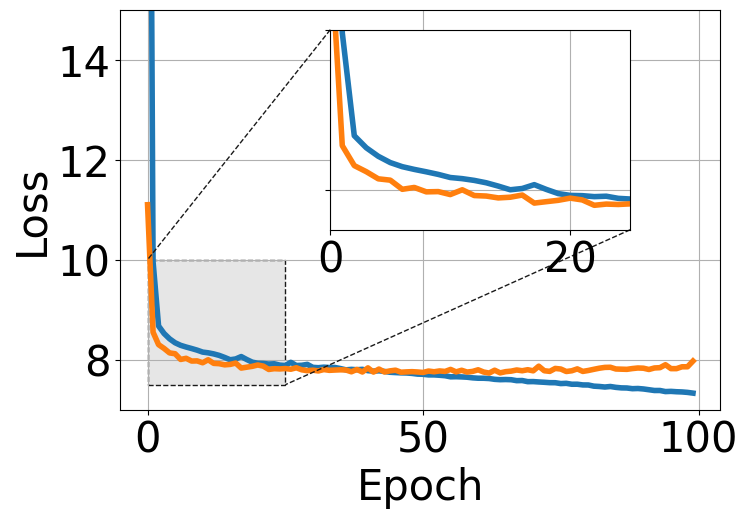

In [53]:
fig = plt.figure(figsize=(6,4))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([0.35, 0.45, 0.5, 0.5]) # Smaller figure
axes.plot(metrics5[['loss','val_loss']], label=['train_loss','val_loss'], lw=4)
axes.set_ylim(7,15)

axes2.plot(metrics5[['loss','val_loss']], lw=4)
axes2.set_xlim(0,25)
axes2.set_ylim(7.5,10)
#plt.xticks(visible=False)
plt.yticks(visible=False)

axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.grid()
axes2.grid()

mark_inset(axes, axes2, loc1=2, loc2=4, fc="0.9", ec="0.1", ls='--')
# axes.yaxis.set_major_formatter(formatter)

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x1ba7cc72a30>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x1ba7cccb6d0>)

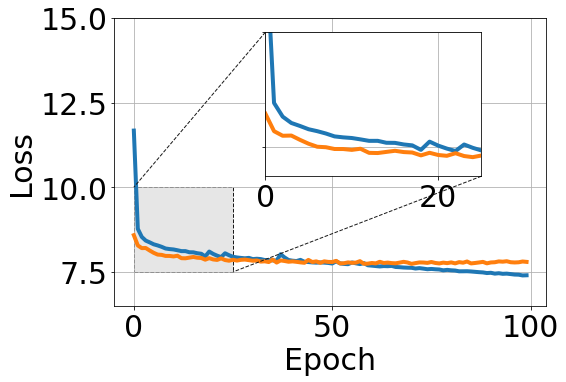

In [69]:
fig = plt.figure(figsize=(6,4))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([0.35, 0.45, 0.5, 0.5]) # Smaller figure
axes.plot(metrics5[['loss','val_loss']], label=['train_loss','val_loss'], lw=4)
axes.set_ylim(6.5,15)

axes2.plot(metrics5[['loss','val_loss']], lw=4)
axes2.set_xlim(0,25)
axes2.set_ylim(7.5,10)
#plt.xticks(visible=False)
plt.yticks(visible=False)

axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.grid()
axes2.grid()

mark_inset(axes, axes2, loc1=2, loc2=4, fc="0.9", ec="0.1", ls='--')
# axes.yaxis.set_major_formatter(formatter)

In [39]:
model5.save("my_dir/8e-5")

INFO:tensorflow:Assets written to: my_dir/8e-5\assets


INFO:tensorflow:Assets written to: my_dir/8e-5\assets


In [42]:
model5 = keras.models.load_model("my_dir/8e-5", custom_objects={'GEH_loss': GEH_loss}) 

In [43]:
model5.predict((Wv5,Xv5))

array([[ 65.11422 ,  66.9684  ,  74.43863 , ...,  74.58737 ,  49.080624,
         48.29925 ],
       [ 57.514423,  60.31341 ,  66.18984 , ...,  67.447174,  48.095432,
         47.138527],
       [ 58.58546 ,  61.463196,  66.45977 , ...,  64.69653 ,  46.446976,
         45.878887],
       ...,
       [127.52245 , 133.86073 , 144.79308 , ..., 144.51715 ,  97.430626,
         83.50301 ],
       [117.47536 , 122.5035  , 129.76321 , ..., 121.12706 ,  85.88177 ,
         75.12699 ],
       [112.43143 , 115.2083  , 128.58572 , ..., 133.20749 ,  95.75674 ,
         85.56812 ]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions5 = model5.predict((Wv5,Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5)

MAE5 = mean_absolute_error(yv5,test_predictions5)

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

eval5 = [MSE5, MAE5, RMSE5, MAPE5]
print(eval5)

In [ ]:
GEH, count = ga.GEH(np.asarray(yv5), np.asarray(test_predictions5))
GEH5 = count/GEH.size
print(GEH5)

# 15 mins ahead

In [36]:
def build_model_15(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wt15.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=Xt15.shape[1:], name="DeepInput")
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    
    
    # Wide Model
    flatten_15w = keras.layers.TimeDistributed(keras.layers.Flatten())(channel_Wide)
    Bi_15 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=units, return_sequences=True),
        merge_mode="ave"
    )(flatten_15w)
    
    
    # Deep Model
    # CNN 
    CNN_15 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_15 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_15)
    # LSTM          
    LSTM_15 = keras.layers.LSTM(units=units, return_sequences=True)(flatten_15)

    
    # Concatenation 
    concat = keras.layers.concatenate([Bi_15, LSTM_15], axis=1)

    # Attention
    Att_15 = SeqSelfAttention(attention_activation='sigmoid')(concat)
    merge = keras.layers.Flatten()(Att_15)

    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(merge)
    
    # Model
    model_15 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_15.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss=GEH_loss, metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_15

In [37]:
tuner15 = RandomSearch(
    build_model_15,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="8e-15",
)

In [48]:
tuner15.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [49]:
tuner15.search((Wt15,Xt15), yt15, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop], 
            verbose=2)

Trial 60 Complete [00h 12m 16s]
val_loss: 8.299551963806152

Best val_loss So Far: 8.114250183105469
Total elapsed time: 17h 02m 34s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [50]:
tuner15.results_summary(1)

Results summary
Results in C:\Runs\8e-15
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 69
filters: 96
kernel_size: 2
learning_rate: 0.001
Score: 8.114250183105469


### Best model

In [38]:
scaler_filename = "Best_HP/8e-15"
best_hp15 = joblib.load(scaler_filename) 

model15 = tuner15.hypermodel.build(best_hp15)

In [51]:
best_hp15 = tuner15.get_best_hyperparameters()[0]
model15 = tuner15.hypermodel.build(best_hp15)

In [52]:
scaler_filename = "Best_HP/8e-15"
joblib.dump(best_hp15, scaler_filename) 

['Best_HP/8e-15']

In [53]:
model15.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 DeepInput (InputLayer)         [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 WideInput (InputLayer)         [(None, 3, 3, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 4, 6, 96)  480        ['DeepInput[0][0]']              
 buted)                                                                                     

In [39]:
model15.fit((Wt15,Xt15), yt15, validation_split = val_percent,
            epochs = 100, 
            verbose = 1)

Epoch 1/100
778/778 [==============================] - 18s 16ms/step - loss: 32.9727 - mean_absolute_error: 113.5859 - root_mean_squared_error: 151.9140 - mean_absolute_percentage_error: 46397608.0000 - val_loss: 12.7559 - val_mean_absolute_error: 45.3260 - val_root_mean_squared_error: 66.3230 - val_mean_absolute_percentage_error: 2926276.5000
Epoch 2/100
778/778 [==============================] - 11s 15ms/step - loss: 10.8957 - mean_absolute_error: 28.8140 - root_mean_squared_error: 43.7873 - mean_absolute_percentage_error: 52054648.0000 - val_loss: 8.9095 - val_mean_absolute_error: 22.9175 - val_root_mean_squared_error: 31.8027 - val_mean_absolute_percentage_error: 3172358.5000
Epoch 3/100
778/778 [==============================] - 11s 14ms/step - loss: 8.9544 - mean_absolute_error: 20.7284 - root_mean_squared_error: 29.0932 - mean_absolute_percentage_error: 55698148.0000 - val_loss: 8.5637 - val_mean_absolute_error: 20.7221 - val_root_mean_squared_error: 28.1071 - val_mean_absolute_

Epoch 25/100
778/778 [==============================] - 11s 14ms/step - loss: 8.1593 - mean_absolute_error: 17.5684 - root_mean_squared_error: 24.1336 - mean_absolute_percentage_error: 9325434.0000 - val_loss: 8.2168 - val_mean_absolute_error: 19.0537 - val_root_mean_squared_error: 25.8408 - val_mean_absolute_percentage_error: 3597094.0000
Epoch 26/100
778/778 [==============================] - 11s 14ms/step - loss: 8.1809 - mean_absolute_error: 17.6452 - root_mean_squared_error: 24.2134 - mean_absolute_percentage_error: 15637613.0000 - val_loss: 8.1408 - val_mean_absolute_error: 18.6219 - val_root_mean_squared_error: 25.2488 - val_mean_absolute_percentage_error: 3434346.5000
Epoch 27/100
778/778 [==============================] - 11s 14ms/step - loss: 8.1585 - mean_absolute_error: 17.5424 - root_mean_squared_error: 24.0943 - mean_absolute_percentage_error: 10764692.0000 - val_loss: 8.1827 - val_mean_absolute_error: 18.7803 - val_root_mean_squared_error: 25.4339 - val_mean_absolute_per

Epoch 49/100
778/778 [==============================] - 12s 15ms/step - loss: 8.0145 - mean_absolute_error: 17.0241 - root_mean_squared_error: 23.3263 - mean_absolute_percentage_error: 9697295.0000 - val_loss: 8.1034 - val_mean_absolute_error: 18.4722 - val_root_mean_squared_error: 24.9888 - val_mean_absolute_percentage_error: 3673601.7500
Epoch 50/100
778/778 [==============================] - 11s 15ms/step - loss: 8.0028 - mean_absolute_error: 17.0098 - root_mean_squared_error: 23.3083 - mean_absolute_percentage_error: 7726151.5000 - val_loss: 8.1510 - val_mean_absolute_error: 18.7316 - val_root_mean_squared_error: 25.2252 - val_mean_absolute_percentage_error: 3605791.2500
Epoch 51/100
778/778 [==============================] - 11s 14ms/step - loss: 7.9971 - mean_absolute_error: 16.9725 - root_mean_squared_error: 23.2604 - mean_absolute_percentage_error: 7720096.0000 - val_loss: 8.1075 - val_mean_absolute_error: 18.5495 - val_root_mean_squared_error: 25.1297 - val_mean_absolute_perce

Epoch 73/100
778/778 [==============================] - 11s 15ms/step - loss: 7.8577 - mean_absolute_error: 16.5635 - root_mean_squared_error: 22.6030 - mean_absolute_percentage_error: 7029817.0000 - val_loss: 8.1960 - val_mean_absolute_error: 18.7227 - val_root_mean_squared_error: 25.1467 - val_mean_absolute_percentage_error: 3577164.2500
Epoch 74/100
778/778 [==============================] - 11s 15ms/step - loss: 7.8434 - mean_absolute_error: 16.5234 - root_mean_squared_error: 22.5379 - mean_absolute_percentage_error: 7275935.5000 - val_loss: 8.1561 - val_mean_absolute_error: 18.6802 - val_root_mean_squared_error: 25.1400 - val_mean_absolute_percentage_error: 3727604.7500
Epoch 75/100
778/778 [==============================] - 12s 15ms/step - loss: 7.8405 - mean_absolute_error: 16.5074 - root_mean_squared_error: 22.5125 - mean_absolute_percentage_error: 7092801.5000 - val_loss: 8.1289 - val_mean_absolute_error: 18.4974 - val_root_mean_squared_error: 24.9676 - val_mean_absolute_perce

Epoch 97/100
778/778 [==============================] - 11s 14ms/step - loss: 7.6924 - mean_absolute_error: 15.9813 - root_mean_squared_error: 21.8206 - mean_absolute_percentage_error: 6717743.0000 - val_loss: 8.1720 - val_mean_absolute_error: 18.6597 - val_root_mean_squared_error: 25.0306 - val_mean_absolute_percentage_error: 3641538.7500
Epoch 98/100
778/778 [==============================] - 11s 15ms/step - loss: 7.6996 - mean_absolute_error: 15.9703 - root_mean_squared_error: 21.8020 - mean_absolute_percentage_error: 7033806.0000 - val_loss: 8.1625 - val_mean_absolute_error: 18.6813 - val_root_mean_squared_error: 25.0430 - val_mean_absolute_percentage_error: 3530399.5000
Epoch 99/100
778/778 [==============================] - 12s 15ms/step - loss: 7.6890 - mean_absolute_error: 15.9393 - root_mean_squared_error: 21.7520 - mean_absolute_percentage_error: 6896915.0000 - val_loss: 8.1659 - val_mean_absolute_error: 18.6391 - val_root_mean_squared_error: 25.0131 - val_mean_absolute_perce

In [49]:
metrics15 = pd.DataFrame(model15.history.history)

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x1ba7cd15df0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x1ba7cd6db20>)

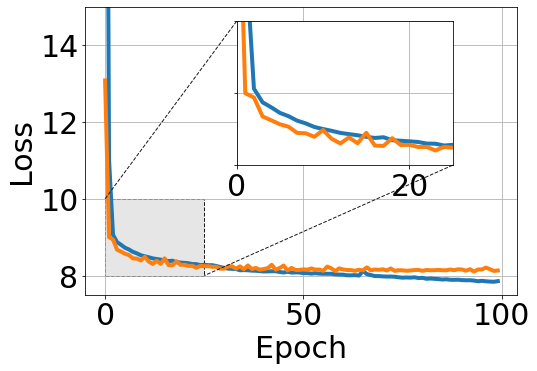

In [70]:
fig = plt.figure(figsize=(6,4))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([0.35, 0.45, 0.5, 0.5]) # Smaller figure
axes.plot(metrics15[['loss','val_loss']], label=['train_loss','val_loss'], lw=4)
axes.set_ylim(7.5,15)

axes2.plot(metrics15[['loss','val_loss']], lw=4)
axes2.set_xlim(0,25)
axes2.set_ylim(8,10)
#plt.xticks(visible=False)
plt.yticks(visible=False)

axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.grid()
axes2.grid()

mark_inset(axes, axes2, loc1=2, loc2=4, fc="0.9", ec="0.1", ls='--')
# axes.yaxis.set_major_formatter(formatter)

In [55]:
model15.save("my_dir/8e-15")

INFO:tensorflow:Assets written to: my_dir/8e-15\assets


INFO:tensorflow:Assets written to: my_dir/8e-15\assets


In [58]:
model15 = keras.models.load_model("my_dir/8e-15", custom_objects={'GEH_loss': GEH_loss})

In [59]:
model15.predict((Wv15,Xv15))

array([[ 59.914017,  62.400864,  66.59089 , ...,  62.892387,  41.96364 ,
         42.714767],
       [ 59.319687,  61.635986,  66.439186, ...,  62.728733,  41.67466 ,
         43.38703 ],
       [ 59.87405 ,  63.038902,  67.31254 , ...,  65.04761 ,  44.9862  ,
         44.385315],
       ...,
       [134.57304 , 138.70264 , 149.42848 , ..., 147.51271 ,  98.897156,
         89.95299 ],
       [131.08788 , 135.3107  , 145.67247 , ..., 143.98311 ,  96.54508 ,
         87.03639 ],
       [117.05011 , 121.29782 , 129.28815 , ..., 128.12141 ,  86.40668 ,
         77.564575]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions15 = model15.predict((Wv15,Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15)

MAE15 = mean_absolute_error(yv15,test_predictions15)

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

eval15 = [MSE15, MAE15, RMSE15, MAPE15]
print(eval15)

In [ ]:
GEH, count = ga.GEH(np.asarray(yv15), np.asarray(test_predictions15))
GEH15 = count/GEH.size
print(GEH15)

# 30 mins ahead

In [40]:
def build_model_30(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wt30.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=Xt30.shape[1:], name="DeepInput")
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    
    
    # Wide Model
    flatten_30w = keras.layers.TimeDistributed(keras.layers.Flatten())(channel_Wide)
    Bi_30 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=units, return_sequences=True),
        merge_mode="ave"
    )(flatten_30w)
    
    
    # Deep Model
    # CNN 
    CNN_30 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_30 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_30)
    # LSTM          
    LSTM_30 = keras.layers.LSTM(units=units, return_sequences=True)(flatten_30)

    
    # Concatenation 
    concat = keras.layers.concatenate([Bi_30, LSTM_30], axis=1)

    # Attention
    Att_30 = SeqSelfAttention(attention_activation='sigmoid')(concat)
    merge = keras.layers.Flatten()(Att_30)

    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(merge)
    
    # Model
    model_30 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_30.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss=GEH_loss, metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_30

In [41]:
tuner30 = RandomSearch(
    build_model_30,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="8e-30",
)

In [64]:
tuner30.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [65]:
tuner30.search((Wt30,Xt30), yt30, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

Trial 60 Complete [00h 15m 21s]
val_loss: 8.496138095855713

Best val_loss So Far: 8.389375686645508
Total elapsed time: 15h 37m 01s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [66]:
tuner30.results_summary(1)

Results summary
Results in C:\Runs\8e-30
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 29
filters: 32
kernel_size: 2
learning_rate: 0.001
Score: 8.389375686645508


### Best model

In [42]:
scaler_filename = "Best_HP/8e-30"
best_hp30 = joblib.load(scaler_filename) 

model30 = tuner30.hypermodel.build(best_hp30)

In [67]:
best_hp30 = tuner30.get_best_hyperparameters()[0]
model30 = tuner30.hypermodel.build(best_hp30)

In [68]:
scaler_filename = "8e-30"
joblib.dump(best_hp30, scaler_filename) 

['8e-30']

In [69]:
model30.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 DeepInput (InputLayer)         [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 WideInput (InputLayer)         [(None, 3, 3, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 4, 6, 32)  160        ['DeepInput[0][0]']              
 buted)                                                                                     

In [43]:
model30.fit((Wt30,Xt30), yt30, validation_split = val_percent,
            epochs = 100, 
            verbose = 1)

Epoch 1/100
778/778 [==============================] - 18s 17ms/step - loss: 47.1435 - mean_absolute_error: 162.0404 - root_mean_squared_error: 196.8695 - mean_absolute_percentage_error: 46246040.0000 - val_loss: 30.8889 - val_mean_absolute_error: 121.3819 - val_root_mean_squared_error: 152.5595 - val_mean_absolute_percentage_error: 3614740.5000
Epoch 2/100
778/778 [==============================] - 11s 14ms/step - loss: 25.3005 - mean_absolute_error: 87.7429 - root_mean_squared_error: 119.0651 - mean_absolute_percentage_error: 48849996.0000 - val_loss: 15.9143 - val_mean_absolute_error: 61.5757 - val_root_mean_squared_error: 85.9507 - val_mean_absolute_percentage_error: 3288421.0000
Epoch 3/100
778/778 [==============================] - 11s 15ms/step - loss: 14.4412 - mean_absolute_error: 44.1834 - root_mean_squared_error: 66.2245 - mean_absolute_percentage_error: 49596796.0000 - val_loss: 10.6979 - val_mean_absolute_error: 33.4027 - val_root_mean_squared_error: 49.2655 - val_mean_abs

Epoch 25/100
778/778 [==============================] - 11s 14ms/step - loss: 8.5592 - mean_absolute_error: 18.9045 - root_mean_squared_error: 26.0694 - mean_absolute_percentage_error: 57029644.0000 - val_loss: 8.5255 - val_mean_absolute_error: 20.6045 - val_root_mean_squared_error: 28.7487 - val_mean_absolute_percentage_error: 4013516.2500
Epoch 26/100
778/778 [==============================] - 11s 14ms/step - loss: 8.5347 - mean_absolute_error: 18.8404 - root_mean_squared_error: 25.9493 - mean_absolute_percentage_error: 56663312.0000 - val_loss: 8.4977 - val_mean_absolute_error: 20.4282 - val_root_mean_squared_error: 28.6417 - val_mean_absolute_percentage_error: 4206797.0000
Epoch 27/100
778/778 [==============================] - 12s 15ms/step - loss: 8.5350 - mean_absolute_error: 18.8346 - root_mean_squared_error: 25.9592 - mean_absolute_percentage_error: 56493692.0000 - val_loss: 8.5078 - val_mean_absolute_error: 20.4232 - val_root_mean_squared_error: 28.6220 - val_mean_absolute_pe

Epoch 49/100
778/778 [==============================] - 11s 14ms/step - loss: 8.3956 - mean_absolute_error: 18.2719 - root_mean_squared_error: 25.1542 - mean_absolute_percentage_error: 47387648.0000 - val_loss: 8.4180 - val_mean_absolute_error: 19.8610 - val_root_mean_squared_error: 27.7170 - val_mean_absolute_percentage_error: 4036396.2500
Epoch 50/100
778/778 [==============================] - 12s 15ms/step - loss: 8.3770 - mean_absolute_error: 18.2134 - root_mean_squared_error: 25.0551 - mean_absolute_percentage_error: 46535704.0000 - val_loss: 8.4193 - val_mean_absolute_error: 20.0440 - val_root_mean_squared_error: 27.9563 - val_mean_absolute_percentage_error: 3957377.0000
Epoch 51/100
778/778 [==============================] - 11s 14ms/step - loss: 8.3819 - mean_absolute_error: 18.2077 - root_mean_squared_error: 25.0721 - mean_absolute_percentage_error: 46357036.0000 - val_loss: 8.4315 - val_mean_absolute_error: 20.1115 - val_root_mean_squared_error: 28.0020 - val_mean_absolute_pe

Epoch 73/100
778/778 [==============================] - 11s 15ms/step - loss: 8.3062 - mean_absolute_error: 17.9116 - root_mean_squared_error: 24.6433 - mean_absolute_percentage_error: 32704988.0000 - val_loss: 8.3858 - val_mean_absolute_error: 19.8280 - val_root_mean_squared_error: 27.4629 - val_mean_absolute_percentage_error: 3992941.7500
Epoch 74/100
778/778 [==============================] - 11s 15ms/step - loss: 8.2902 - mean_absolute_error: 17.8953 - root_mean_squared_error: 24.6087 - mean_absolute_percentage_error: 31843082.0000 - val_loss: 8.4322 - val_mean_absolute_error: 19.9979 - val_root_mean_squared_error: 27.7200 - val_mean_absolute_percentage_error: 3930868.7500
Epoch 75/100
778/778 [==============================] - 11s 15ms/step - loss: 8.2990 - mean_absolute_error: 17.9026 - root_mean_squared_error: 24.6144 - mean_absolute_percentage_error: 31070586.0000 - val_loss: 8.4008 - val_mean_absolute_error: 19.7306 - val_root_mean_squared_error: 27.3640 - val_mean_absolute_pe

Epoch 97/100
778/778 [==============================] - 11s 14ms/step - loss: 8.1996 - mean_absolute_error: 17.6201 - root_mean_squared_error: 24.2193 - mean_absolute_percentage_error: 12240675.0000 - val_loss: 8.3611 - val_mean_absolute_error: 19.6599 - val_root_mean_squared_error: 27.2965 - val_mean_absolute_percentage_error: 4101505.0000
Epoch 98/100
778/778 [==============================] - 11s 14ms/step - loss: 8.2036 - mean_absolute_error: 17.6292 - root_mean_squared_error: 24.2329 - mean_absolute_percentage_error: 12063919.0000 - val_loss: 8.3694 - val_mean_absolute_error: 19.6839 - val_root_mean_squared_error: 27.2622 - val_mean_absolute_percentage_error: 4007533.0000
Epoch 99/100
778/778 [==============================] - 11s 14ms/step - loss: 8.1790 - mean_absolute_error: 17.5978 - root_mean_squared_error: 24.1793 - mean_absolute_percentage_error: 12157500.0000 - val_loss: 8.3730 - val_mean_absolute_error: 19.6466 - val_root_mean_squared_error: 27.2089 - val_mean_absolute_pe

In [50]:
metrics30 = pd.DataFrame(model30.history.history)

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x1ba7cdc07f0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x1ba7ce165b0>)

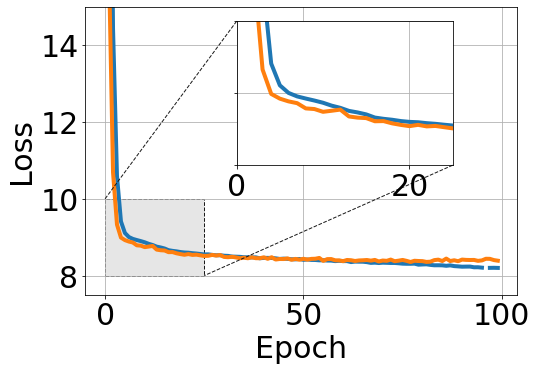

In [71]:
fig = plt.figure(figsize=(6,4))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([0.35, 0.45, 0.5, 0.5]) # Smaller figure
axes.plot(metrics30[['loss','val_loss']], label=['train_loss','val_loss'], lw=4)
axes.set_ylim(7.5,15)

axes2.plot(metrics30[['loss','val_loss']], lw=4)
axes2.set_xlim(0,25)
axes2.set_ylim(8,10)
#plt.xticks(visible=False)
plt.yticks(visible=False)

axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.grid()
axes2.grid()

mark_inset(axes, axes2, loc1=2, loc2=4, fc="0.9", ec="0.1", ls='--')
# axes.yaxis.set_major_formatter(formatter)

In [71]:
model30.save("my_dir/8e-30")

INFO:tensorflow:Assets written to: my_dir/8e-30\assets


INFO:tensorflow:Assets written to: my_dir/8e-30\assets


In [74]:
model30 = keras.models.load_model("my_dir/8e-30", custom_objects={'GEH_loss': GEH_loss})

In [75]:
model30.predict((Wv30,Xv30))

array([[ 58.13458 ,  61.590725,  64.924515, ...,  62.39058 ,  41.57397 ,
         39.713192],
       [ 53.75056 ,  56.94462 ,  60.58965 , ...,  58.520596,  39.087505,
         37.197865],
       [ 52.43781 ,  55.585846,  58.977676, ...,  57.70283 ,  37.39748 ,
         36.955467],
       ...,
       [138.88947 , 145.51346 , 153.3124  , ..., 150.96898 , 101.40951 ,
         87.95067 ],
       [133.13705 , 140.08047 , 149.09775 , ..., 146.12573 , 102.373055,
         89.8578  ],
       [118.53354 , 123.04162 , 132.54817 , ..., 127.252914,  88.37382 ,
         78.956276]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions30 = model30.predict((Wv30,Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30)

MAE30 = mean_absolute_error(yv30,test_predictions30)

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

eval30 = [MSE30, MAE30, RMSE30, MAPE30]
print(eval30)

In [ ]:
GEH, count = ga.GEH(np.asarray(yv30), np.asarray(test_predictions30))
GEH30 = count/GEH.size
print(GEH30)

# 60 mins ahead

In [44]:
def build_model_60(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wt60.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=Xt60.shape[1:], name="DeepInput")
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    
    
    # Wide Model
    flatten_60w = keras.layers.TimeDistributed(keras.layers.Flatten())(channel_Wide)
    Bi_60 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=units, return_sequences=True),
        merge_mode="ave"
    )(flatten_60w)
    
    
    # Deep Model
    # CNN 
    CNN_60 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_60 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_60)
    # LSTM          
    LSTM_60 = keras.layers.LSTM(units=units, return_sequences=True)(flatten_60)

    
    # Concatenation 
    concat = keras.layers.concatenate([Bi_60, LSTM_60], axis=1)

    # Attention
    Att_60 = SeqSelfAttention(attention_activation='sigmoid')(concat)
    merge = keras.layers.Flatten()(Att_60)

    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(merge)
    
    # Model
    model_60 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_60.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss=GEH_loss, metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_60

In [45]:
tuner60 = RandomSearch(
    build_model_60,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="8e-60",
)

In [80]:
tuner60.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [81]:
tuner60.search((Wt60,Xt60), yt60, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

Trial 60 Complete [00h 27m 39s]
val_loss: 8.612287521362305

Best val_loss So Far: 8.589139461517334
Total elapsed time: 14h 20m 35s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [82]:
tuner60.results_summary(1)

Results summary
Results in C:\Runs\8e-60
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 97
filters: 96
kernel_size: 2
learning_rate: 0.001
Score: 8.589139461517334


### Best model

In [46]:
scaler_filename = "Best_HP/8e-60"
best_hp60 = joblib.load(scaler_filename) 

model60 = tuner60.hypermodel.build(best_hp60)

In [83]:
best_hp60 = tuner60.get_best_hyperparameters()[0]
model60 = tuner60.hypermodel.build(best_hp60)

In [84]:
scaler_filename = "Best_HP/8e-60"
joblib.dump(best_hp60, scaler_filename) 

['Best_HP/8e-60']

In [85]:
model60.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 DeepInput (InputLayer)         [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 WideInput (InputLayer)         [(None, 3, 3, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 4, 6, 96)  480        ['DeepInput[0][0]']              
 buted)                                                                                     

In [47]:
model60.fit((Wt60,Xt60), yt60, validation_split = val_percent,
            epochs = 100, 
            verbose = 1
            )

Epoch 1/100
777/777 [==============================] - 17s 15ms/step - loss: 27.5109 - mean_absolute_error: 94.0633 - root_mean_squared_error: 134.0143 - mean_absolute_percentage_error: 50650248.0000 - val_loss: 10.3837 - val_mean_absolute_error: 31.4504 - val_root_mean_squared_error: 45.8115 - val_mean_absolute_percentage_error: 3011140.5000
Epoch 2/100
777/777 [==============================] - 10s 13ms/step - loss: 9.7242 - mean_absolute_error: 24.3309 - root_mean_squared_error: 34.7642 - mean_absolute_percentage_error: 49637704.0000 - val_loss: 9.1128 - val_mean_absolute_error: 23.3799 - val_root_mean_squared_error: 33.0132 - val_mean_absolute_percentage_error: 3484056.0000
Epoch 3/100
777/777 [==============================] - 10s 13ms/step - loss: 9.0974 - mean_absolute_error: 21.4366 - root_mean_squared_error: 29.6957 - mean_absolute_percentage_error: 55962792.0000 - val_loss: 8.9843 - val_mean_absolute_error: 22.8154 - val_root_mean_squared_error: 32.1586 - val_mean_absolute_pe

Epoch 25/100
777/777 [==============================] - 10s 13ms/step - loss: 8.6037 - mean_absolute_error: 19.1241 - root_mean_squared_error: 26.3364 - mean_absolute_percentage_error: 51073720.0000 - val_loss: 8.6672 - val_mean_absolute_error: 21.1665 - val_root_mean_squared_error: 29.9837 - val_mean_absolute_percentage_error: 4102937.2500
Epoch 26/100
777/777 [==============================] - 10s 13ms/step - loss: 8.5936 - mean_absolute_error: 19.0756 - root_mean_squared_error: 26.2635 - mean_absolute_percentage_error: 50730588.0000 - val_loss: 8.6468 - val_mean_absolute_error: 21.0415 - val_root_mean_squared_error: 29.7582 - val_mean_absolute_percentage_error: 4127766.7500
Epoch 27/100
777/777 [==============================] - 11s 14ms/step - loss: 8.5825 - mean_absolute_error: 19.0355 - root_mean_squared_error: 26.2019 - mean_absolute_percentage_error: 50445448.0000 - val_loss: 8.6699 - val_mean_absolute_error: 21.2092 - val_root_mean_squared_error: 29.7867 - val_mean_absolute_pe

Epoch 49/100
777/777 [==============================] - 10s 13ms/step - loss: 8.4480 - mean_absolute_error: 18.4992 - root_mean_squared_error: 25.4255 - mean_absolute_percentage_error: 34669852.0000 - val_loss: 8.6040 - val_mean_absolute_error: 20.7856 - val_root_mean_squared_error: 29.0979 - val_mean_absolute_percentage_error: 3987543.7500
Epoch 50/100
777/777 [==============================] - 11s 14ms/step - loss: 8.4366 - mean_absolute_error: 18.4707 - root_mean_squared_error: 25.3794 - mean_absolute_percentage_error: 33783552.0000 - val_loss: 8.6437 - val_mean_absolute_error: 21.0472 - val_root_mean_squared_error: 29.5322 - val_mean_absolute_percentage_error: 4109884.5000
Epoch 51/100
777/777 [==============================] - 11s 14ms/step - loss: 8.4346 - mean_absolute_error: 18.5035 - root_mean_squared_error: 25.4214 - mean_absolute_percentage_error: 32492884.0000 - val_loss: 8.5757 - val_mean_absolute_error: 20.6483 - val_root_mean_squared_error: 28.9990 - val_mean_absolute_pe

Epoch 73/100
777/777 [==============================] - 10s 13ms/step - loss: 8.3022 - mean_absolute_error: 18.0730 - root_mean_squared_error: 24.8077 - mean_absolute_percentage_error: 15882849.0000 - val_loss: 8.5801 - val_mean_absolute_error: 20.6803 - val_root_mean_squared_error: 28.8433 - val_mean_absolute_percentage_error: 3993496.5000
Epoch 74/100
777/777 [==============================] - 10s 13ms/step - loss: 8.2939 - mean_absolute_error: 18.0149 - root_mean_squared_error: 24.7298 - mean_absolute_percentage_error: 15980887.0000 - val_loss: 8.6127 - val_mean_absolute_error: 20.8641 - val_root_mean_squared_error: 29.1409 - val_mean_absolute_percentage_error: 3971004.2500
Epoch 75/100
777/777 [==============================] - 10s 13ms/step - loss: 8.3008 - mean_absolute_error: 18.0057 - root_mean_squared_error: 24.7326 - mean_absolute_percentage_error: 15868238.0000 - val_loss: 8.5915 - val_mean_absolute_error: 20.6818 - val_root_mean_squared_error: 28.8101 - val_mean_absolute_pe

Epoch 97/100
777/777 [==============================] - 10s 13ms/step - loss: 8.2069 - mean_absolute_error: 17.6581 - root_mean_squared_error: 24.2172 - mean_absolute_percentage_error: 16528472.0000 - val_loss: 8.5907 - val_mean_absolute_error: 20.8063 - val_root_mean_squared_error: 28.8930 - val_mean_absolute_percentage_error: 4062593.5000
Epoch 98/100
777/777 [==============================] - 10s 13ms/step - loss: 8.1957 - mean_absolute_error: 17.6422 - root_mean_squared_error: 24.2001 - mean_absolute_percentage_error: 16506365.0000 - val_loss: 8.6621 - val_mean_absolute_error: 21.1862 - val_root_mean_squared_error: 29.4531 - val_mean_absolute_percentage_error: 3920546.7500
Epoch 99/100
777/777 [==============================] - 10s 13ms/step - loss: 8.1821 - mean_absolute_error: 17.6314 - root_mean_squared_error: 24.1652 - mean_absolute_percentage_error: 16698426.0000 - val_loss: 8.5967 - val_mean_absolute_error: 20.7616 - val_root_mean_squared_error: 28.9849 - val_mean_absolute_pe

In [48]:
metrics60 = pd.DataFrame(model60.history.history)

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x1ba7de2b760>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x1ba7de8adc0>)

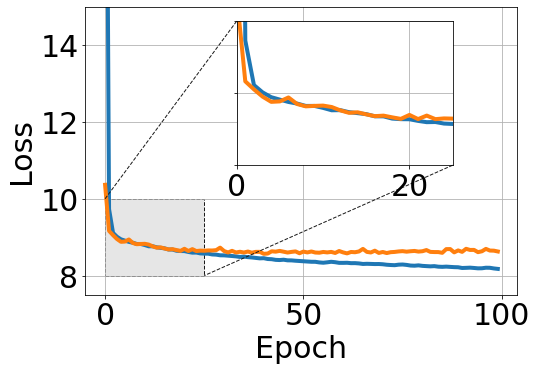

In [72]:
fig = plt.figure(figsize=(6,4))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([0.35, 0.45, 0.5, 0.5]) # Smaller figure
axes.plot(metrics60[['loss','val_loss']], label=['train_loss','val_loss'], lw=4)
axes.set_ylim(7.5,15)

axes2.plot(metrics60[['loss','val_loss']], lw=4)
axes2.set_xlim(0,25)
axes2.set_ylim(8,10)
#plt.xticks(visible=False)
plt.yticks(visible=False)

axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.grid()
axes2.grid()

mark_inset(axes, axes2, loc1=2, loc2=4, fc="0.9", ec="0.1", ls='--')
# axes.yaxis.set_major_formatter(formatter)

In [87]:
model60.save("my_dir/8e-60")

INFO:tensorflow:Assets written to: my_dir/8e-60\assets


INFO:tensorflow:Assets written to: my_dir/8e-60\assets


In [90]:
model60 = keras.models.load_model("my_dir/8e-60", custom_objects={'GEH_loss': GEH_loss})

In [91]:
model60.predict((Wv60,Xv60))

array([[ 55.69512 ,  59.354942,  63.22116 , ...,  63.12973 ,  44.7746  ,
         43.90793 ],
       [ 52.107468,  54.763996,  58.16891 , ...,  58.224815,  37.27435 ,
         37.397926],
       [ 49.15518 ,  51.655193,  54.368217, ...,  54.762875,  34.371017,
         36.145336],
       ...,
       [124.479164, 132.75945 , 140.61221 , ..., 136.97383 ,  89.99701 ,
         81.90206 ],
       [129.01045 , 135.77612 , 144.7396  , ..., 139.82118 ,  88.422035,
         77.29512 ],
       [122.19745 , 128.5338  , 137.10838 , ..., 130.47055 ,  80.12406 ,
         69.22607 ]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions60 = model60.predict((Wv60,Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60)

MAE60 = mean_absolute_error(yv60,test_predictions60)

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

eval60 = [MSE60, MAE60, RMSE60, MAPE60]
print(eval60)

In [ ]:
GEH, count = ga.GEH(np.asarray(yv60), np.asarray(test_predictions60))
GEH60 = count/GEH.size
print(GEH60)

# RESULTS

## General results

In [ ]:
l = ['MSE','MAE','RMSE','MAPE','Horizon']

In [ ]:
eval5.append(5)
eval15.append(15)
eval30.append(30)
eval60.append(60)

In [ ]:
df = pd.DataFrame(np.array([eval5,eval15,eval30,eval60]),columns=l)
df.set_index('Horizon')

## GEH

In [ ]:
n = [' 5 ',' 15 ',' 30 ',' 60 ']
df2 = pd.DataFrame(np.array([[GEH5, GEH15, GEH30, GEH60]]), columns=n)
print(df2)

## Save Loss

In [ ]:
metrics5.to_csv('Loss/8e-5.csv') 
metrics15.to_csv('Loss/8e-15.csv') 
metrics30.to_csv('Loss/8e-30.csv') 
metrics60.to_csv('Loss/8e-60.csv') 